<a href="https://colab.research.google.com/github/ShubhamYadav369/Shine_data_analyst_Scrap_data/blob/main/Shine_data_analyst_Scrap_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Programming in Python

Name:Shubham Yadav


**Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

LinkedIn Jobs
Indeed
Naukri
Glassdoor
AngelList
🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?

# I am beginning the scraping process for my project.

In [ ]:
# Importing important libraries
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
import requests
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12

In [ ]:
# url response
url = 'https://www.shine.com/job-search/data-analyst-jobs-in-delhi?q=data%20analyst&loc=delhi'
response = requests.get(url)
print('The response that we got back from the URL is', response.status_code)

The response that we got back from the URL is 200


In [ ]:
# parsing html
soup = BeautifulSoup(response.text,'html.parser')
html = soup.find_all('div')

In [ ]:
# fetching the text from the html and Removing any spaces
req = soup.select('div h2[itemprop="name"]')
titles = [r.text for r in req]
titles = [t.replace("  ", "") for t in titles]
titles[:5]

['Data Analyst , Senior Data Analyst , Data Analyst - Tec ...',
 'Data Analyst / Senior Data Analyst',
 'Data Analyst SPSS Advance Excel',
 'Varahe Analytics - Data Analyst - VBA/Tableau/Power BI',
 'Senior Data Analyst']

In [ ]:
orgs = soup.find_all('div', class_='jobCard_jobCard_cName__mYnow')
# fetching the text from the HTML
orgs1 = [o.text for o in orgs]
sub_string ='Hiring'
# Splitting the string on a sub string and getting the first index (Cleaning up names)
orgs1 = [o.split(sub_string)[0] for o in orgs1]
# Removing any spaces
orgs1 = [o.strip() for o in orgs1]

In [ ]:
orgs1[:5]

['AppSoft Solutions',
 'iCRC',
 'Cocentrus',
 'Varahe Analytics Private Limited',
 'Inc42 Media']

In [ ]:
# fetching the HTML data from the class where the location data is available
loc = soup.find_all('div', class_='jobCard_jobCard_lists__fdnsc')
location = [l.text for l in loc]
location = [re.findall("Yrs?(.*)$", i)[0] for i in location]
location = [l.replace("+4", ", ") for l in location]

In [ ]:
location[:5]

['Delhi+8Noida, Bangalore, Chennai, Hyderabad, Gurugram, Kolkata, Pune, Mumbai City',
 'Delhi',
 'Noida',
 'Delhi',
 'Delhi']

In [ ]:
# fetching the text from the loc variable for the experience
exp = [l.text for l in loc]
experience = [re.findall("^(.*) Yrs?", i)[0] for i in exp]

In [ ]:
experience[:5]

['0 to 4', '3 to 8', '5 to 10', '2 to 6', '4 to 8']

In [ ]:
vac = soup.find_all('ul', class_='jobCard_jobCard_jobDetail__jD82J')
# fetching the text from the HTML
vac = [v.text for v in vac ]

In [ ]:
# Cleaning up the data
vacancies = [int(re.findall(r'\d+', text)[0]) if re.findall(r'\d+', text) else 1 for text in vac]

In [ ]:
vacancies[:5]

[10, 1, 1, 1, 1]

In [ ]:
data = {'Titles':titles, 'Firm Name': orgs1,
        'Job Location':location, 'Experience':experience,
        'Positions': vacancies}
df = pd.DataFrame(data)

In [ ]:
# Checking for duplicates based on the titles column (you can pick any other column of your choice)
df['Titles'].duplicated().sum()

6

In [ ]:
# Dropping duplicates
df.drop_duplicates(subset='Titles', inplace=True)

In [ ]:
# checking  duplicates  dropped or not
df['Titles'].duplicated().sum()

0

In [ ]:
df.head()

,Titles,Firm Name,Job Location,Experience,Positions
0,"Data Analyst , Senior Data Analyst , Data Anal...",AppSoft Solutions,"Delhi+8Noida, Bangalore, Chennai, Hyderabad, G...",0 to 4,10
1,Data Analyst / Senior Data Analyst,iCRC,Delhi,3 to 8,1
2,Data Analyst SPSS Advance Excel,Cocentrus,Noida,5 to 10,1
3,Varahe Analytics - Data Analyst - VBA/Tableau/...,Varahe Analytics Private Limited,Delhi,2 to 6,1
4,Senior Data Analyst,Inc42 Media,Delhi,4 to 8,1


In [ ]:
# Creating a New Column
df['Category'] = ['Fresher' if '0' in i else 'Experienced' for i in df['Experience']]

In [ ]:
# DataFrame created based on Descending values
final_df = df.sort_values(by='Positions', ascending=False)
final_df.head()

,Titles,Firm Name,Job Location,Experience,Positions,Category
0,"Data Analyst , Senior Data Analyst , Data Anal...",AppSoft Solutions,"Delhi+8Noida, Bangalore, Chennai, Hyderabad, G...",0 to 4,10,Fresher
1,Data Analyst / Senior Data Analyst,iCRC,Delhi,3 to 8,1,Experienced
2,Data Analyst SPSS Advance Excel,Cocentrus,Noida,5 to 10,1,Fresher
3,Varahe Analytics - Data Analyst - VBA/Tableau/...,Varahe Analytics Private Limited,Delhi,2 to 6,1,Experienced
4,Senior Data Analyst,Inc42 Media,Delhi,4 to 8,1,Experienced


In [ ]:
TITLES = []
COMPANIES = []
LOCATIONS = []
EXPERIENCE = []
VACANCIES = []

Range = range(1,6)
for i in Range:
    link = f'https://www.shine.com/job-search/data-analyst-jobs-in-delhi?q=data%20analyst&loc=delhi'
    response = requests.get(link)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        req = soup.select('div h2[itemprop="name"]')
        titles = [r.text for r in req]
        titles1 = [t.replace("|","") for t in titles]
        titles = [t.replace("  ", "") for t in titles1]
        TITLES.extend(titles)

        orgs = soup.find_all('div', class_='jobCard_jobCard_cName__mYnow')
        orgs1 = [o.text for o in orgs]
        sub_str = "Hiring"
        companies = [o.split(sub_str)[0] for o in orgs1]
        COMPANIES.extend(companies)

        loc = soup.find_all('div', class_='jobCard_jobCard_lists__fdnsc')
        location = [l.text for l in loc]
        location = [re.findall("Yrs?(.*)$", i)[0] for i in location]
        location = [l.replace("+4", ", ") for l in location]
        LOCATIONS.extend(location)

        # Fetching Experience
        exp = [l.text for l in loc]
        experience = [re.findall("^(.*) Yrs?", i)[0] for i in exp]
        EXPERIENCE.extend(experience)

        vacancies = soup.find_all('ul', class_='jobCard_jobCard_jobDetail__jD82J')
        vac = [v.text for v in vacancies]
        vacancies = [int(re.findall(r'\d+', text)[0]) if re.findall(r'\d+', text) else 1 for text in vac]
        VACANCIES.extend(vacancies)

    else:
        print('Invalid Response')

df = pd.DataFrame({'Job Title': TITLES,
                   'Employer': COMPANIES,
                   'Job Location': LOCATIONS,
                   'Experience': EXPERIENCE,
                   'Positions': VACANCIES})
df.to_csv('Shine_scrap.csv', index=False)

print(f'We have managed to fetch {len(df)} job postings while scraping {len(Range)} pages.')

We have managed to fetch 100 job postings while scraping 5 pages.


Here's a summary of the main components of the code:

##**1.** Initialization:

Initializes empty lists (TITLES, COMPANIES, LOCATIONS, EXPERIENCE, VACANCIES) to store the extracted data.
Defines a range of pages (1 to 5) to iterate through.

##**2.**Scraping Loop:

Iterates through each page in the specified range.
Constructs the URL for each page based on the search criteria (data analyst jobs in Delhi).
Sends an HTTP GET request to the Shine website and checks if the response status code is 200 (OK).

##**3.**Data Extraction:

If the response is valid, the HTML content is parsed using BeautifulSoup.
Extracts job titles, company names, job locations, experience requirements, and the number of vacancies from the parsed HTML.

##**4.**Data Cleaning:

Performs some cleaning on the extracted data, such as removing unwanted characters and formatting.

##**5.**DataFrame Creation:

Constructs a pandas DataFrame using the extracted and cleaned data.
CSV Export:

Exports the DataFrame to a CSV file named 'Shine_scrap.csv' without including the index.

In [ ]:
shine_data = pd.read_csv('/content/Shine_scrap.csv')
shine_data.head(2)

,Job Title,Employer,Job Location,Experience,Positions
0,"Data Analyst , Senior Data Analyst , Data Anal...",AppSoft Solutions,"Delhi+8Noida, Bangalore, Chennai, Hyderabad, G...",0 to 4,10
1,Data Analyst / Senior Data Analyst,iCRC,Delhi,3 to 8,1


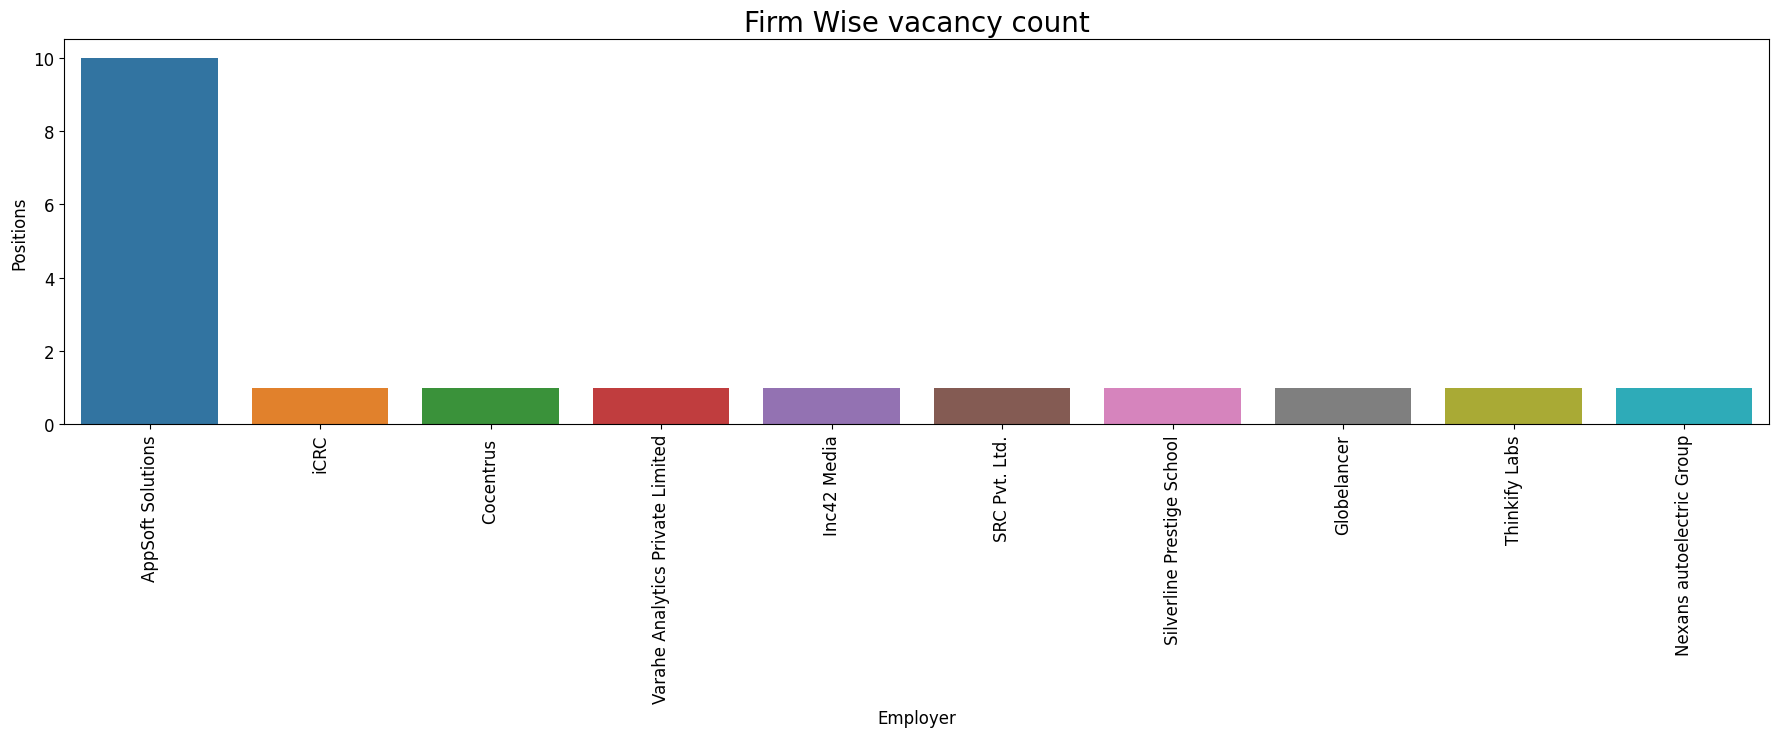

In [ ]:
plt.figure(figsize=(22,5), dpi=100)
ax = sns.barplot(x=df['Employer'][:10], y=df['Positions'][:10])
plt.title('Firm Wise vacancy count', fontsize=20)
plt.xticks(rotation=90)
plt.show()

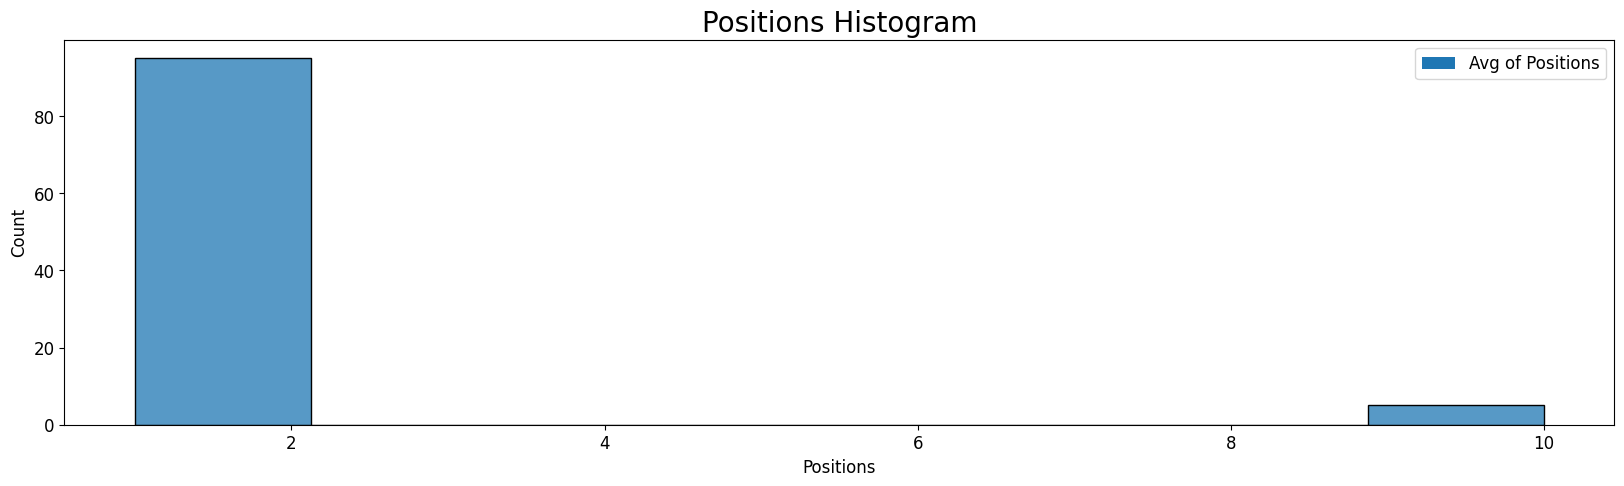

In [ ]:
plt.figure(figsize=(20,5), dpi=100)
ax = sns.histplot(df['Positions'])
plt.title('Positions Histogram', fontsize=20)
plt.legend(['Avg of Positions'])
plt.show()